<a href="https://colab.research.google.com/github/nkvij/PSE607-QuTip-Notebooks/blob/main/QuTip_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PSE607: Advanced Topics in Photonics** 




In [1]:
!pip install qutip
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 3.4MB 4.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for qutip: filename=qutip-4.5.2-cp36-cp36m-linux_x86_64.whl size=12466402 sha256=1bdb090f644f20c4e627ee3d8496479c74e5c6a5f26ba81e522e3f50472d2980
  Stored in directory: /root/.cache/pip/wheels/ae/90/e9/f26fdecfb6c0e9d9d6f5fa564d16d26ff2bdfd8ad6e7a8a28a
Successfully built qutip


## **QuTip: Quantum Optics Toolbox in Python**
[Reference](http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/qutip-lectures/master/Lecture-0-Introduction-to-QuTiP.ipynb)


QuTiP is a python package for calculations and numerical simulations of quantum systems. 

It includes facilities for representing and doing calculations with quantum objects such state vectors (wavefunctions), as bras/kets/density matrices, quantum operators of single and composite systems, and superoperators (useful for defining master equations).


---



## Quantum Objects `qObj`

At the heart of the QuTiP package is the `qobj` class, which is used for representing quantum object such as states and operator. 

The `qobj` class contains all the information required to describe a quantum system, such as its matrix representation, composite structure and dimensionality. 

A quantum object can be initialized as:

In [19]:
q = Qobj( [[1, 0], [0, 1]] )
print(q)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]


In [20]:
q = Qobj( [[1], [0]] )
print(q)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]


The properties and operations on a `Qobj`:

In [21]:
# the shape of the matrix data representation
q.shape

(2, 1)

In [22]:
# the matrix data itself. in sparse matrix format. 
q.data

<2x1 sparse matrix of type '<class 'numpy.complex128'>'
	with 1 stored elements in Compressed Sparse Row format>

In [23]:
# some additional properties
q.isherm, q.type 

(False, 'ket')

In [24]:
# take hermitian conjugate. Note the type of quantum object after the operation
print(q.dag())

Quantum object: dims = [[1], [2]], shape = (1, 2), type = bra
Qobj data =
[[1. 0.]]


Learn about more possible [operations](http://qutip.org/docs/latest/guide/guide-basics.html#basic-operations-on-quantum-objects) and [manipulations](http://qutip.org/docs/latest/guide/guide-states.html#manipulating-states-and-operators).

Normally we do not need to create `Qobj` instances from stratch. Instead we can use functions in QuTiP that generates common states and operators for us:

In [25]:
# Basis states

N = 4 # number of states in the Hilbert space
n = 1 # the state that will be occupied

basis_state = basis(N, n) # initializes the nth basis state among the N basis states that define the Hilbert space

print(basis_state)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]


In [26]:
# a coherent state
print(coherent(N=10, alpha=1.0))

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.60653066]
 [0.60653066]
 [0.42888194]
 [0.24761511]
 [0.12380753]
 [0.0553686 ]
 [0.02260303]
 [0.00854887]
 [0.00299672]
 [0.00110007]]


There are many more pre defined states. [Have a peek!](http://qutip.org/docs/latest/apidoc/functions.html?highlight=bloch%20sphere#module-qutip.states)



---


## [Bloch Sphere visualization of quantum objects](http://qutip.org/docs/latest/apidoc/classes.html?highlight=bloch%20sphere#bloch-sphere)
`Qobj` in all ways is equivalent to a state $\mid \psi \rangle$ and thus can be visualized on a Bloch sphere. 

Define the state $$\mid \psi \rangle = \cos \frac{\theta}{2} |0\rangle + \sin \frac{\theta}{2} e^{i \phi} |1\rangle$$

As the state is represented by two basis states, we can define the corresponding `Qobj` as

In [27]:
zero_state = basis(2,0) # for |0>
one_state = basis(2,1) # for |1>

print("|0> = ", zero_state)
print('')
print("|1> = ", one_state)

|0> =  Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

|1> =  Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]


For the state $|1 \rangle$:

 $\theta = \pi$ and $\phi = 0$

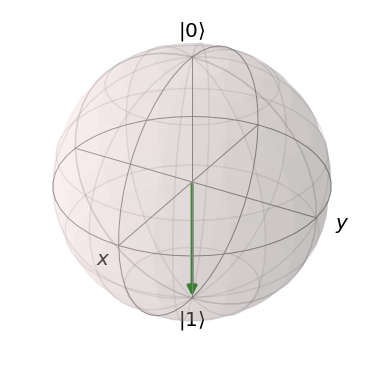

In [28]:
# define theta and phi
theta = np.pi
phi = 0

# define psi
psi = np.cos(theta/2)*zero_state + np.sin(theta/2)*np.exp(1j*phi)*one_state

# initialize the bloch sphere
bloch_sphere = Bloch()
bloch_sphere.clear()

# plot psi on bloch sphere
bloch_sphere.add_states(psi)

bloch_sphere.show()

For the state $|y \rangle$ = $\frac{1}{\sqrt{2}}(|0 \rangle + i |1 \rangle)$:

 $\theta = \pi/2$ and $\phi = \pi/2$

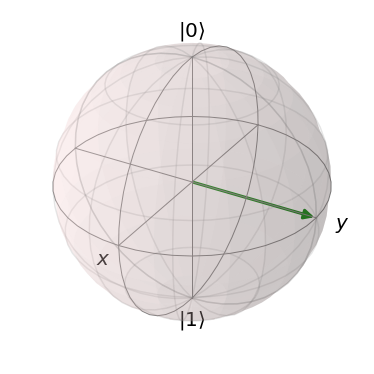

In [29]:
# define theta and phi
theta = np.pi/2
phi = np.pi/2

# define psi
psi = np.cos(theta/2)*zero_state + np.sin(theta/2)*np.exp(1j*phi)*one_state

# initialize the bloch sphere
bloch_sphere = Bloch()
bloch_sphere.clear()

# plot psi on bloch sphere
bloch_sphere.add_states(psi)

bloch_sphere.show()

### Exercise 1

(a) Play around with $\theta$ and $\phi$. See if the visualizations match your intuition.

(b) Try solving Problem #2 of Quiz #2 here. Take any value of $\theta$ and $\phi$, plot the state, the diametrically opposite state and check if they are orthogonal.
(Hint: Quantum objects of appropriate dimensions can indeed be multiplied)


---



## Simulating Rabi oscillations

First, we need to define a basis for our calculation. As we work with a two-level system, code defined in the above section can be used.



In [12]:
# basis states for the two-level system
ground_state = basis(2,0) # for |g>
excited_state = basis(2,1) # for |e>

print("|g> = ", ground_state)
print('')
print("|e> = ", excited_state)

|g> =  Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

|e> =  Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]


Second, we need to define the Hamiltonian that governs the dyamics. Here, we assume zero detuning between the electric field and the two level system. The Hamiltonian for such a scenario will be:

$$H = \Omega_o (|g \rangle \langle e| + |e \rangle \langle g|) $$

Where $\Omega_o$ is the Rabi frequency. It includes the factors such as the dipole matrix element.

In [30]:
omega = 1 # rabi frequency

Hamiltonian = omega*(ground_state*excited_state.dag() + excited_state*ground_state.dag())

print(Hamiltonian)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]


To solve the schrodinger equation, we use the function [sesolve](http://qutip.org/docs/4.0.2/apidoc/functions.html?highlight=sesolve#module-qutip.sesolve). The function has the following inputs:

* H (qutip.qobj) – system Hamiltonian, or a callback function for time-dependent Hamiltonians.
* rho0 (qutip.qobj) – initial density matrix or state vector (ket).
* tlist (list / array) – list of times for t.
* e_ops (list of qutip.qobj / callback function single) – single operator or list of operators for which to evaluate expectation values.



In [31]:
psi = excited_state
tlist = np.linspace(0,2*np.pi/omega,500)
e_ops = [ground_state*ground_state.dag(), excited_state*excited_state.dag()]

result = sesolve(Hamiltonian, psi, tlist, e_ops, progress_bar=True)

10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.02s. Est. time left: 00:00:00:00
40.0%. Run time:   0.03s. Est. time left: 00:00:00:00
50.0%. Run time:   0.04s. Est. time left: 00:00:00:00
60.0%. Run time:   0.05s. Est. time left: 00:00:00:00
70.0%. Run time:   0.06s. Est. time left: 00:00:00:00
80.0%. Run time:   0.07s. Est. time left: 00:00:00:00
90.0%. Run time:   0.08s. Est. time left: 00:00:00:00
Total run time:   0.09s


In [32]:
print(result)

Result object with sesolve data.
--------------------------------
expect = True
num_expect = 2, num_collapse = 0


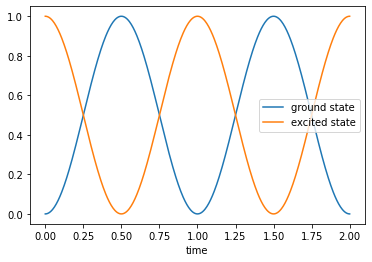

In [33]:
plt.plot(omega*tlist/np.pi, result.expect[0], label= 'ground state')
plt.plot(omega*tlist/np.pi, result.expect[1], label = 'excited state')
plt.xlabel('time')
plt.legend()

### Exercise 2

Try to simulate for non-zero detuning case. 

(Hint: The Hamiltonian will be time dependent. Follow [this](http://qutip.org/docs/latest/guide/dynamics/dynamics-time.html#methods-for-writing-time-dependent-operators) procedure to simulate time dependent Hamiltonians)